In [396]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. linear regression

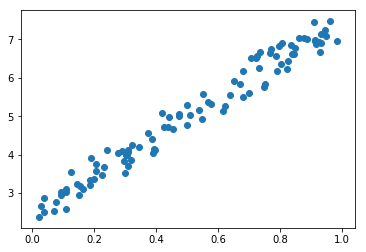

In [397]:
X = np.random.rand(100)
y = 5*X + 2 + np.random.rand(100)
plt.scatter(X,y)
plt.show()

5.008771564892159 2.479083099345226 0.06789375524361861


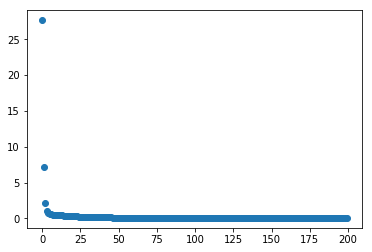

In [398]:
# h = b + a * X
# the purpose is minimize mean((h-y)**2) which is the costfunction
# h = y+dy = b+db + (a+da) * X
# dy= db + da * X
# cost = (db + da * X)^2
# dcost/da,dcost/db should be 0 when cost at minimal 
# dcost/da = 2*(db + da*X)*X = 2*dy * X
# dcost/db = 2*dy
# learning rate alpha  = 0.1

# a = a - alpha * dcost/da  
# b = b - alpha * dcost/db


a,b = 0,0
alpha = 0.4
epoch = 0
cost = []
while epoch < 200:
    h = b + a*X
    dy = h-y
    cost.append(np.mean(dy**2))
    dcost_da = np.mean(dy * X)
    dcost_db = np.mean(dy)
    a = a - alpha * dcost_da  
    b = b - alpha * dcost_db
    epoch += 1 
print (a,b,cost[-1])
plt.plot(cost,'o')
plt.show()

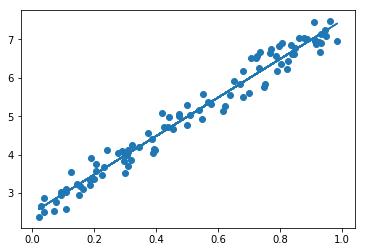

In [399]:
plt.scatter(X,y)
plt.plot(X,a*X+b)
plt.show()

# 2. logistic regression 
for binary data

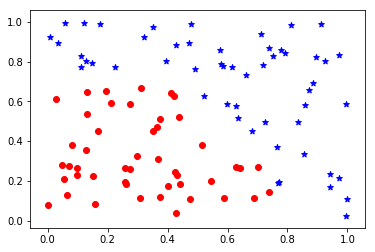

In [400]:
data = np.random.rand(100,2)
y = np.array([1 if i[0]**2 + i[1]**2 < 0.6 else 0 for i in data ])
m = {1:'o',0:'*'}
c = {1:'r',0:'b'}
for i,d in enumerate(data):
    plt.scatter(d[0],d[1],marker=m[y[i]],color=c[y[i]])

In [401]:
# logistic regression is defined as h(x)= sigmoid(W * x)
# costfunction needs log

def sigmoid(z):
    return 1/(1+np.exp(-z))
def costFunction(h,y):
    return np.mean(-y*np.log(h)-(1-y)*np.log(1-h))

[-10.95839983 -12.57279665] [11.2094553] 0.1742076759240809


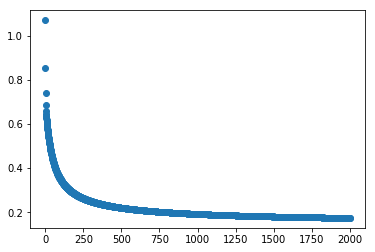

In [402]:
X = data
W = np.random.rand(X.shape[1])
b = np.random.rand(1)
alpha = 1
epoch = 0
cost = []
counts = y.shape[0]
while epoch < 2000:
    h = sigmoid(b+np.sum(W * X,axis=1))
    dy = h-y
    cost.append(costFunction(h,y))
    dcost_dW = np.dot(dy,X)/counts
    dcost_db = np.mean(dy)
    W -= alpha * dcost_dW  
    b -= alpha * dcost_db
    epoch += 1 
print (W,b,cost[-1])
plt.plot(cost,'o')
plt.show()

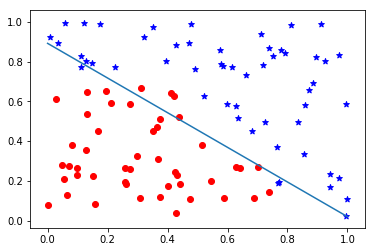

In [403]:
for i,d in enumerate(data):
    plt.scatter(d[0],d[1],marker=m[y[i]],color=c[y[i]])

x1=np.linspace(0,1,100)
x2 = (-b-W[0]*x1)/W[1]
plt.plot(x1,x2)
plt.show()

## 2.1. regularized logistic regression

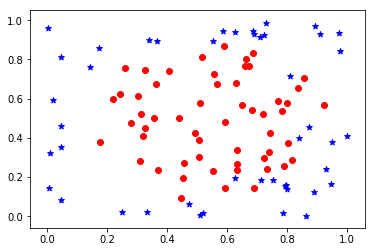

In [404]:
data = np.random.rand(100,2)
y = np.array([1 if (i[0]-0.5)**2+(i[1]-0.5)**2 < 0.1+0.1*np.random.rand(1) else 0 for i in data ])
for i,d in enumerate(data):
    plt.scatter(d[0],d[1],marker=m[y[i]],color=c[y[i]])

In [405]:
# to regularize parameter a lamda/m*W^2 will be added to costfunction
# a lamda/m*W will be added to diffrential

def costFunction_reg(h,y,W,Lambda):
    return np.mean(-y*np.log(h)-(1-y)*np.log(1-h))+ Lambda*np.sum(W*W)/(2*y.shape[0])

[ 12.20359923  13.48920041 -15.99591281 -16.8528267   13.10942283
  -6.45938957  -1.77407259] [-3.77072395] 0.3316591862569869


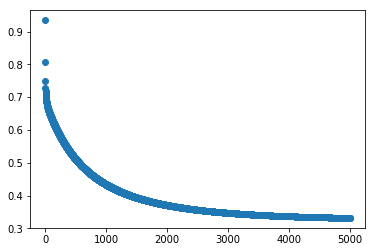

In [406]:
#add features to fit the data
x1 = data[:,0]
x2 = data[:,1]
X = np.hstack((data,data**2,(x1*x2).reshape(-1,1),(x1*x2**2).reshape(-1,1),(x1**2*x2).reshape(-1,1)))

W = np.random.rand(X.shape[1])
b = np.random.rand(1)
alpha = 1
Lambda = 0.01
epoch = 0
cost = []
counts = y.shape[0]
while epoch < 5000:
    h = sigmoid(b+np.sum(W * X,axis=1))
    dy = h-y
    cost.append(costFunction_reg(h,y,W,Lambda))
    dcost_dW = (np.dot(dy,X)+Lambda*W)/counts
    dcost_db = np.mean(dy)
    W -= alpha * dcost_dW  
    b -= alpha * dcost_db
    epoch += 1 
print (W,b,cost[-1])
plt.plot(cost,'o')
plt.show()

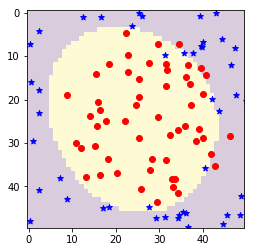

In [407]:
for i,d in enumerate(data):
    plt.scatter(d[0]*50,d[1]*50,marker=m[y[i]],color=c[y[i]])

size = 50
grid = np.ndarray((size,size))

for i,x1 in enumerate(np.linspace(0,1,size)):
    for j,x2 in enumerate(np.linspace(0,1,size)):
        grid[i,j] = sigmoid(b+np.sum(W*np.array([x1,x2,x1**2,x2**2,x1*x2,x1*x2**2,x1**2*x2])))>0.5
plt.imshow(grid,alpha=0.2)
plt.show()

# 3. SVM

In [410]:
from sklearn import svm
x1 = data[:,0]
x2 = data[:,1]
X = np.hstack((data,data**2,(x1*x2).reshape(-1,1),(x1*x2**2).reshape(-1,1),(x1**2*x2).reshape(-1,1)))
# 'rbf' means guassion function, C is the penalty factor, large C cause overfit, small C cause underfit
clf = svm.SVC(gamma='scale',kernel = 'rbf',C=1)
clf.fit(X, y)  

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

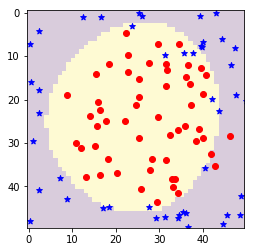

In [411]:
for i,d in enumerate(data):
    plt.scatter(d[0]*50,d[1]*50,marker=m[y[i]],color=c[y[i]])

size = 50
grid = np.ndarray((size,size))
for i,x1 in enumerate(np.linspace(0,1,size)):
    for j,x2 in enumerate(np.linspace(0,1,size)):
        grid[i,j] = clf.predict(np.array([[x1,x2,x1**2,x2**2,x1*x2,x1*x2**2,x1**2*x2]]))
plt.imshow(grid,alpha=0.2)
plt.show()

# 4. K-means

In [412]:
# algrithem:
# Initialize centroids 
# for iter = 1:iterations:
    # Cluster assignment step: Assign each data point to the closest centroid. 
    # Move centroid step: Compute means based on centroid  


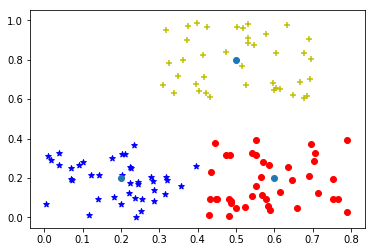

In [413]:
data = np.empty((0,2))
y=[]
m=0
points = np.array([[0.2,0.2],[0.6,0.2],[0.5,0.8]])

for point in points:
    temp = point + (np.random.rand(40,2) -np.array([0.5,0.5]))*0.4
    data = np.vstack((data,temp))
    y +=[m]*40
    m+=1
    
y= np.array(y)
m = {2:'+',1:'o',0:'*'}
c = {2:'y',1:'r',0:'b'}
for i,d in enumerate(data):
    plt.scatter(d[0],d[1],marker=m[y[i]],color=c[y[i]])
plt.scatter(points[:,0],points[:,1])

[[0.18620845 0.18813778]
 [0.5098787  0.78692905]
 [0.57670441 0.17705923]]


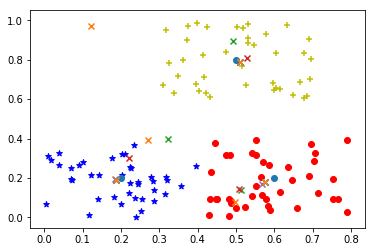

In [414]:
def distance(x,point):
    return np.sum((x-point)**2)**0.5

def findclosest(X,centers):
    idx=[]
    for x in X:
        dmin=1000000
        for i,center in enumerate(centers):
            if distance(x,center)<dmin:
                imin=i
                dmin=distance(x,center)
        idx.append(imin)
    return idx
                
def computemeans(X,idx,K):
    center = np.zeros((K,X.shape[1]))
    counts = np.zeros(K)
    for i,ix in enumerate(idx):
        center[ix,:] += X[i,:]
        counts[ix] += 1
    return center/counts[:,None]

for i,d in enumerate(data):
    plt.scatter(d[0],d[1],marker=m[y[i]],color=c[y[i]])
plt.scatter(points[:,0],points[:,1])

K = 3
X = data
centers = np.random.rand(K,X.shape[1])
plt.scatter(centers[:,0],centers[:,1],marker='x')

epoch = 0
while epoch < 10:
    idx = findclosest(X,centers)
    centers = computemeans(X,idx,K)
    plt.scatter(centers[:,0],centers[:,1],marker='x')
    epoch += 1 

print (centers)

# 5. Principle Component Analysis (PCA)

In [395]:
# PCA is like find the most import eigen values
# It can be used to reduce data dimentions
# needs subtract mean and normalize first befor

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# 6. K-fold

In [455]:
import random
def Kfold(K,data,random_seed=None):
    l=len(data)
    if l<K: raise Exception('data length smaller than split number')
    if K<=1: raise Exception('K should be >1')
    d = int(l/K)
    start=0
    splits=[]
    for i in range(K-1):
        splits.append([start,start+d])
        start += d
    splits.append([start,l])
     
    random.seed(random_seed)
    disorder = list(range(l))
    random.shuffle(disorder)
    print(disorder)
    
    idx=[]
    for split in splits:
        train = disorder[:split[0]]+disorder[split[1]:]
        cv = disorder[split[0]:split[1]]
        idx.append([train,cv])
    return idx

In [458]:
data = [1,2,3,4,5,6,7,8,9,10,11]
Kfold(10,data,3)

[1, 5, 6, 0, 10, 4, 7, 2, 8, 9, 3]


[[[5, 6, 0, 10, 4, 7, 2, 8, 9, 3], [1]],
 [[1, 6, 0, 10, 4, 7, 2, 8, 9, 3], [5]],
 [[1, 5, 0, 10, 4, 7, 2, 8, 9, 3], [6]],
 [[1, 5, 6, 10, 4, 7, 2, 8, 9, 3], [0]],
 [[1, 5, 6, 0, 4, 7, 2, 8, 9, 3], [10]],
 [[1, 5, 6, 0, 10, 7, 2, 8, 9, 3], [4]],
 [[1, 5, 6, 0, 10, 4, 2, 8, 9, 3], [7]],
 [[1, 5, 6, 0, 10, 4, 7, 8, 9, 3], [2]],
 [[1, 5, 6, 0, 10, 4, 7, 2, 9, 3], [8]],
 [[1, 5, 6, 0, 10, 4, 7, 2, 8], [9, 3]]]